In [42]:
import tensorflow as tf

In [43]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam 
from keras.models import Sequential

In [44]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train / 255.0, x_test / 255.0

In [51]:
model =tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])


In [52]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        

In [53]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [54]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10,callbacks = tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6164 - accuracy: 0.8342 - val_loss: 0.2724 - val_accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2614 - accuracy: 0.9240 - val_loss: 0.2011 - val_accuracy: 0.9407
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2024 - accuracy: 0.9415 - val_loss: 0.1654 - val_accuracy: 0.9500
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1651 - accuracy: 0.9523 - val_loss: 0.1401 - val_accuracy: 0.9571
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1392 - accuracy: 0.9592 - val_loss: 0.1236 - val_accuracy: 0.9621
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1203 - accuracy: 0.9651 - val_loss: 0.1167 - val_accuracy: 0.9655
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1061 - accuracy: 0.9689 - val_loss: 0.1026 - val_ac

In [55]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [56]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 8568), started 4 days, 5:08:31 ago. (Use '!kill 8568' to kill it.)

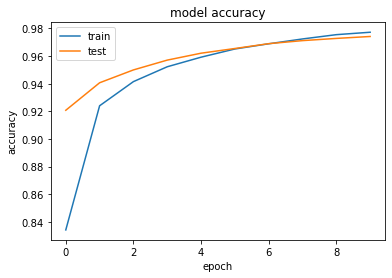

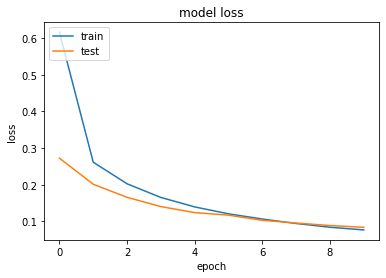

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()